In [288]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

from sklearn.metrics import classification_report, confusion_matrix

### Acquire the train.csv

In [19]:
# Loade the csv files
train = pd.read_csv("train.csv")

# Inspect the shapes
train.shape

(101230332, 10)

In [20]:
# Take a quck peek of the dataframe
train.head()

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
0,0,0,115,5692,0,1,3,1,NaN,NaN
1,1,56943,115,5716,0,2,2,1,37000.0,False
2,2,118363,115,128,0,0,0,1,55000.0,False
3,3,131167,115,7860,0,3,0,1,19000.0,False
4,4,137965,115,7922,0,4,1,1,11000.0,False


In [21]:
# Summarize the train dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101230332 entries, 0 to 101230331
Data columns (total 10 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   row_id                          int64  
 1   timestamp                       int64  
 2   user_id                         int64  
 3   content_id                      int64  
 4   content_type_id                 int64  
 5   task_container_id               int64  
 6   user_answer                     int64  
 7   answered_correctly              int64  
 8   prior_question_elapsed_time     float64
 9   prior_question_had_explanation  object 
dtypes: float64(1), int64(8), object(1)
memory usage: 7.5+ GB


**Takeaways**
- The train dataset has more than 100 millions records. I only need to small portion to calculate the statistics of the past.<br>
    -**I will take the first 1000 user ids.**

In [22]:
# Extract the first 1000 user ids

user_ids1000 = train.user_id.value_counts().sort_index().iloc[0: 1000]
user_ids1000 = user_ids1000.index.to_list()

# Sanity check
print(len(user_ids1000))

# Print the first 5 user ids
user_ids1000[:5]

1000


[115, 124, 2746, 5382, 8623]

In [23]:
# Set the user_id to the index

train = train.set_index("user_id")
train.head()

,row_id,timestamp,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
user_id,,,,,,,,,
115,0,0,5692,0,1,3,1,NaN,NaN
115,1,56943,5716,0,2,2,1,37000.0,False
115,2,118363,128,0,0,0,1,55000.0,False
115,3,131167,7860,0,3,0,1,19000.0,False
115,4,137965,7922,0,4,1,1,11000.0,False


In [24]:
# Subtracts the records for the first 1000 users
train1000 = train.loc[user_ids1000]

# Take a peek at the new dataset
train1000.head()

,row_id,timestamp,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
user_id,,,,,,,,,
115,0,0,5692,0,1,3,1,NaN,NaN
115,1,56943,5716,0,2,2,1,37000.0,False
115,2,118363,128,0,0,0,1,55000.0,False
115,3,131167,7860,0,3,0,1,19000.0,False
115,4,137965,7922,0,4,1,1,11000.0,False


In [25]:
# Sanity check
train1000.tail() # should match the tail of user_ids1000

,row_id,timestamp,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
user_id,,,,,,,,,
5577726,296610,625311764,5328,0,7,0,0,20000.0,False
5577726,296611,625327721,4303,0,8,3,0,10000.0,True
5577726,296612,625344560,4445,0,9,0,1,6000.0,True
5577726,296613,625367161,5206,0,10,1,0,6000.0,True
5577726,296614,625378759,3928,0,11,0,0,13000.0,True


In [26]:
# Print the tail of the user_ids1000
user_ids1000[999]

5577726

In [27]:
# Read the train1000.csv
train1000 = pd.read_csv("train1000.csv", index_col=0)

In [28]:
# Quick summarize the train1000
train1000.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 296615 entries, 115 to 5577726
Data columns (total 9 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   row_id                          296615 non-null  int64  
 1   timestamp                       296615 non-null  int64  
 2   content_id                      296615 non-null  int64  
 3   content_type_id                 296615 non-null  int64  
 4   task_container_id               296615 non-null  int64  
 5   user_answer                     296615 non-null  int64  
 6   answered_correctly              296615 non-null  int64  
 7   prior_question_elapsed_time     289945 non-null  float64
 8   prior_question_had_explanation  295617 non-null  object 
dtypes: float64(1), int64(7), object(1)
memory usage: 22.6+ MB


In [29]:
# Count how many missing values in the prior_question_elapsed_time

mask = train1000.prior_question_elapsed_time.isnull()
mask.sum()

6670

In [30]:
# Count how many missing values in the prior_question_had_explanation

mask = train1000.prior_question_had_explanation.isnull()
mask.sum()

998

**Takeaways**
- The memoery usage of the first 1000 users are only 23 MB
- Missing values are found in columns:
    - prior_question_elapsed_time: 6670 nulls
    - prior_question_had_explanantion: 998 nulls

### Handling the null values

In [31]:
# The values of the two prior columns will always be 0 when the user first interacted with the system
# Take a first user 115 for example

train1000.loc[115].head()

,row_id,timestamp,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
user_id,,,,,,,,,
115,0,0,5692,0,1,3,1,NaN,NaN
115,1,56943,5716,0,2,2,1,37000.0,False
115,2,118363,128,0,0,0,1,55000.0,False
115,3,131167,7860,0,3,0,1,19000.0,False
115,4,137965,7922,0,4,1,1,11000.0,False


**Takeawasy**
- There are only 1000 users so the two prior columns should have at leat 1000 nulls.
- The prior_question_had_explanantion column has 998 nulls:
    - fill the nulls with False
- I will further explore the missing values in the column prior_question_elapased_time.

### Fill the nulls in the prior_question_had_explanation with string False

In [32]:
train1000.prior_question_had_explanation.fillna(False, inplace = True)
train1000.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 296615 entries, 115 to 5577726
Data columns (total 9 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   row_id                          296615 non-null  int64  
 1   timestamp                       296615 non-null  int64  
 2   content_id                      296615 non-null  int64  
 3   content_type_id                 296615 non-null  int64  
 4   task_container_id               296615 non-null  int64  
 5   user_answer                     296615 non-null  int64  
 6   answered_correctly              296615 non-null  int64  
 7   prior_question_elapsed_time     289945 non-null  float64
 8   prior_question_had_explanation  296615 non-null  bool   
dtypes: bool(1), float64(1), int64(7)
memory usage: 30.6 MB


In [33]:
train1000.prior_question_had_explanation.value_counts()

True     267494
False     29121
Name: prior_question_had_explanation, dtype: int64

In [34]:
mask = train1000.prior_question_elapsed_time.isnull()
train1000[mask]

,row_id,timestamp,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
user_id,,,,,,,,,
115,0,0,5692,0,1,3,1,NaN,False
124,46,0,7900,0,0,0,1,NaN,False
2746,76,0,5273,0,0,1,0,NaN,False
2746,89,653762,6808,1,14,-1,-1,NaN,False
5382,96,0,5000,0,0,0,1,NaN,False
...,...,...,...,...,...,...,...,...,...
5566848,296498,162115714,32168,1,21,-1,-1,NaN,False
5568049,296509,0,6028,0,0,3,0,NaN,False
5568049,296537,7746409318,24250,1,20,-1,-1,NaN,False


**Takeaways**
- When the user studies the lecture, the prior_question_elapsed_time documented as NaN.
- I will fill the missing values in the columsn prior_question_elapsed_time with 0.

### Fill the nulls in the prior_question_elapsed_time with string 0

In [35]:
train1000.prior_question_elapsed_time.fillna(0, inplace = True)
train1000.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 296615 entries, 115 to 5577726
Data columns (total 9 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   row_id                          296615 non-null  int64  
 1   timestamp                       296615 non-null  int64  
 2   content_id                      296615 non-null  int64  
 3   content_type_id                 296615 non-null  int64  
 4   task_container_id               296615 non-null  int64  
 5   user_answer                     296615 non-null  int64  
 6   answered_correctly              296615 non-null  int64  
 7   prior_question_elapsed_time     296615 non-null  float64
 8   prior_question_had_explanation  296615 non-null  bool   
dtypes: bool(1), float64(1), int64(7)
memory usage: 30.6 MB


**Takeawasy**
- All the null values have been addressed in the dataset. 

### Split the train1000 into train and test

In [36]:
# Double check the 1000 user_id list
print(len(user_ids1000))
user_ids1000[:5]

1000


[115, 124, 2746, 5382, 8623]

In [126]:
# Create the train and test dataframe

train = pd.DataFrame()
test = pd.DataFrame()

# Set up the train size
train_size = 0.8

for user_id in user_ids1000:
    if train1000.loc[[user_id]].shape[0] <=2:
        print(user_id)
        continue
    elif train1000.loc[[user_id]].shape[0] > 2: 
        df = train1000.loc[[user_id]]
        n = df.shape[0]
        test_start_index = round(train_size * n)
        df_train = df.iloc[:test_start_index]
        df_test = df.iloc[test_start_index:]     
        train = pd.concat([train, df_train])
        test = pd.concat([test, df_test])
    
# Print the shape of the original, train and test
train1000.shape, train.shape, test.shape

1880240
2148001


((296615, 9), (237322, 9), (59290, 9))

**Quick Notes: Such splitting methods will produce some problems in the future.**

In [127]:
# Take a peek at the train dataset
train.head(2)

,row_id,timestamp,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
user_id,,,,,,,,,
115,0,0,5692,0,1,3,1,0.0,False
115,1,56943,5716,0,2,2,1,37000.0,False


In [128]:
# Take a peek at the test
test.head(2)

,row_id,timestamp,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
user_id,,,,,,,,,
115,37,1415188,7882,0,37,2,1,20000.0,True
115,38,1468285,7962,0,38,3,1,17000.0,True


In [129]:
train.tail(2)

,row_id,timestamp,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
user_id,,,,,,,,,
5577726,296611,625327721,4303,0,8,3,0,10000.0,True
5577726,296612,625344560,4445,0,9,0,1,6000.0,True


In [130]:
test.tail(2)

,row_id,timestamp,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
user_id,,,,,,,,,
5577726,296613,625367161,5206,0,10,1,0,6000.0,True
5577726,296614,625378759,3928,0,11,0,0,13000.0,True


In [131]:
# Quick summarize the train
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 237322 entries, 115 to 5577726
Data columns (total 9 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   row_id                          237322 non-null  int64  
 1   timestamp                       237322 non-null  int64  
 2   content_id                      237322 non-null  int64  
 3   content_type_id                 237322 non-null  int64  
 4   task_container_id               237322 non-null  int64  
 5   user_answer                     237322 non-null  int64  
 6   answered_correctly              237322 non-null  int64  
 7   prior_question_elapsed_time     237322 non-null  float64
 8   prior_question_had_explanation  237322 non-null  bool   
dtypes: bool(1), float64(1), int64(7)
memory usage: 16.5 MB


In [132]:
# Quick summarize the test
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59290 entries, 115 to 5577726
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   row_id                          59290 non-null  int64  
 1   timestamp                       59290 non-null  int64  
 2   content_id                      59290 non-null  int64  
 3   content_type_id                 59290 non-null  int64  
 4   task_container_id               59290 non-null  int64  
 5   user_answer                     59290 non-null  int64  
 6   answered_correctly              59290 non-null  int64  
 7   prior_question_elapsed_time     59290 non-null  float64
 8   prior_question_had_explanation  59290 non-null  bool   
dtypes: bool(1), float64(1), int64(7)
memory usage: 4.1 MB


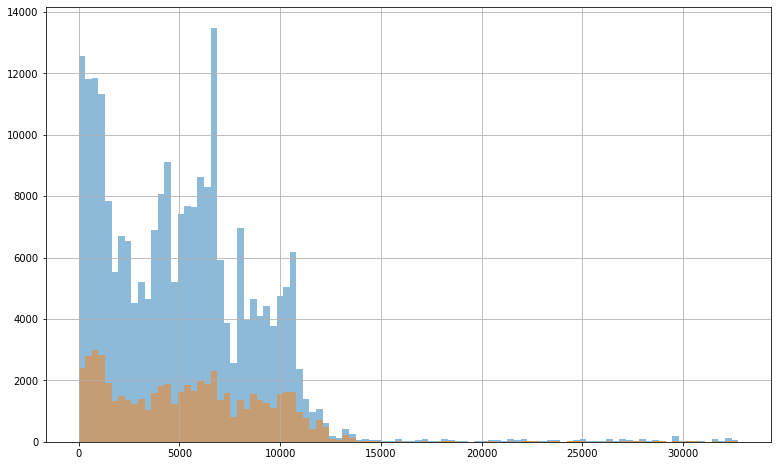

In [133]:
# View the distribution of content_id in train and test

plt.figure(figsize=(13, 8))
train.content_id.hist(bins=100, alpha=0.5)
test.content_id.hist(bins=100, alpha=0.5)

plt.show()

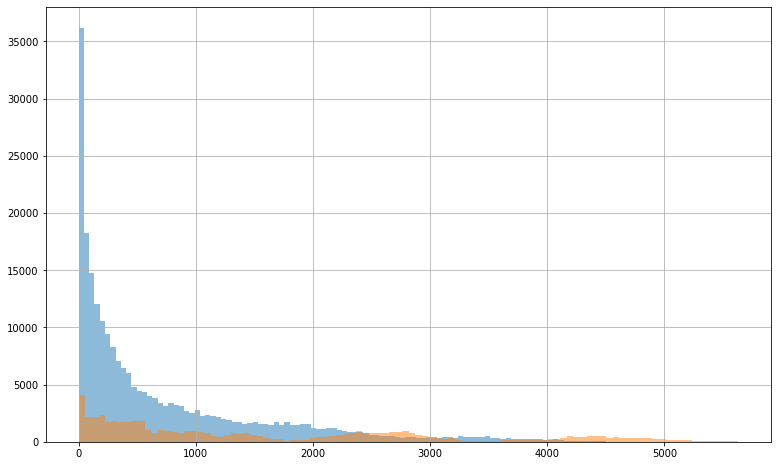

In [134]:
# View the distribution of task_container_id in train and test

plt.figure(figsize=(13, 8))
train.task_container_id.hist(bins=100, alpha=0.5)
test.task_container_id.hist(bins=100, alpha=0.5)

plt.show()

### Count how many lectures each user has reviewed in the train

In [135]:
# Create a new columns for if the student review the lecture or not

train['reviewed_lecture'] = (train['answered_correctly'] == -1)
train.head()

,row_id,timestamp,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation,reviewed_lecture
user_id,,,,,,,,,,
115,0,0,5692,0,1,3,1,0.0,False,False
115,1,56943,5716,0,2,2,1,37000.0,False,False
115,2,118363,128,0,0,0,1,55000.0,False,False
115,3,131167,7860,0,3,0,1,19000.0,False,False
115,4,137965,7922,0,4,1,1,11000.0,False,False


In [136]:
# Compute how many times each user reviewed the lecture

count_reviewed_lecture_train = train.groupby(train.index).reviewed_lecture.sum()
count_reviewed_lecture_train

user_id
115        0
124        0
2746       1
5382       1
8623       2
          ..
5555086    0
5566848    2
5568049    1
5571864    0
5577726    0
Name: reviewed_lecture, Length: 998, dtype: int64

In [137]:
# Merger the new feature with test dataset

test = test.merge(count_reviewed_lecture_train, how="left", on='user_id')

count_reviewed_lecture_test = test.groupby(test.index).reviewed_lecture.sum()
count_reviewed_lecture_test

user_id
115         0
124         0
2746        4
5382       26
8623       44
           ..
5555086     0
5566848    14
5568049    15
5571864     0
5577726     0
Name: reviewed_lecture, Length: 998, dtype: int64

**Takeaways**
- The user didn't review the lecture in the train dataset but reference the lecture in the test dataset.
- It is relative complicated in codes, so just drop the column for now.

In [138]:
# Drop the reviewed_lecture columns

train.drop(columns='reviewed_lecture', inplace=True)
test.drop(columns='reviewed_lecture', inplace=True)

In [139]:
# Print the shapes
train.shape, test.shape

((237322, 9), (59290, 9))

### Drop the lecture rows in train and test

In [140]:
# Drop the lecture rows in train

mask = train['answered_correctly'] != -1
train = train[mask]

# Print the shape
train.shape

(232718, 9)

**Quick note**: the number of observations in the train drops from 237322 to 232718

In [141]:
# Drop the lecture rows in test

mask = test['answered_correctly'] != -1
test = test[mask]

# Print the shape
test.shape

(58222, 9)

**Quick note**: the number of observations in the test drops from 59290 to 58222.

In [142]:
# Reset the index in the train and test

train.reset_index(inplace=True)
train.head()

,user_id,row_id,timestamp,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
0,115,0,0,5692,0,1,3,1,0.0,False
1,115,1,56943,5716,0,2,2,1,37000.0,False
2,115,2,118363,128,0,0,0,1,55000.0,False
3,115,3,131167,7860,0,3,0,1,19000.0,False
4,115,4,137965,7922,0,4,1,1,11000.0,False


In [143]:
# Reset the index in the train and test

test.reset_index(inplace=True)
test.head()

,user_id,row_id,timestamp,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
0,115,37,1415188,7882,0,37,2,1,20000.0,True
1,115,38,1468285,7962,0,38,3,1,17000.0,True
2,115,39,667861680,1278,0,39,3,1,21000.0,False
3,115,40,667971812,2065,0,40,2,1,17000.0,False
4,115,41,667971812,2064,0,40,1,1,17000.0,False


### Feature engineering - To measure the statistics of the whole content
- content_id
- task_container_id

In [144]:
# Compute the statistics of the content by the the content_id

content_stats = train.groupby('content_id').answered_correctly.agg(['mean', 
                                                                    'count', 
                                                                    'std', 
                                                                    'median', 
                                                                    'skew'])


# Rename the name of the columns

content_stats.columns = ['mean_content_accuracy', 
                         'question_content_asked', 
                         'std_content_accuracy', 
                         'median_content_accuracy', 
                         'skew_content_accuracy']

# Take a look at the dataframe
content_stats

,mean_content_accuracy,question_content_asked,std_content_accuracy,median_content_accuracy,skew_content_accuracy
content_id,,,,,
0,0.944444,18,0.235702,1.0,-4.242641
1,0.928571,14,0.267261,1.0,-3.741657
2,0.566372,113,0.497783,1.0,-0.271474
3,0.793103,58,0.408619,1.0,-1.485842
4,0.480519,77,0.502897,0.0,0.079539
...,...,...,...,...,...
13518,0.000000,1,NaN,0.0,NaN
13519,0.000000,1,NaN,0.0,NaN
13520,0.750000,4,0.500000,1.0,-2.000000


In [151]:
# Count how many contend_id in test

test.content_id.value_counts().sort_index()

0         5
1         2
2        21
3         8
4        11
         ..
13516     1
13518     1
13519     2
13521     1
13522     1
Name: content_id, Length: 11076, dtype: int64

In [152]:
# Compute the statistics of the content by the the task_container_id

task_container_stats = train.groupby('task_container_id').answered_correctly.agg(['mean', 
                                                                                  'count', 
                                                                                  'std', 
                                                                                  'median', 
                                                                                  'skew'])


# Rename the name of the columns

task_container_stats.columns = ['mean_task_accuracy', 
                                'question_task_asked', 
                                'std_task_accuracy', 
                                'median_task_accuracy', 
                                'skew_task_accuracy']

# Take a look at the dataframe
task_container_stats

,mean_task_accuracy,question_task_asked,std_task_accuracy,median_task_accuracy,skew_task_accuracy
task_container_id,,,,,
0,0.696215,1004,0.460120,1.0,-0.854589
1,0.522908,1004,0.499724,1.0,-0.091867
2,0.429429,999,0.495243,0.0,0.285566
3,0.543912,1002,0.498317,1.0,-0.176595
4,0.493096,1738,0.500096,0.0,0.027644
...,...,...,...,...,...
4496,1.000000,1,NaN,1.0,NaN
4497,1.000000,1,NaN,1.0,NaN
4498,1.000000,1,NaN,1.0,NaN


In [153]:
# Count how many contend_id in test
test.task_container_id.value_counts().sort_index()

2        2
6       23
7        6
8        2
9        7
        ..
5626     1
5627     1
5628     1
5629     1
5630     1
Name: task_container_id, Length: 5565, dtype: int64

### Feature Engineering: To measure the historical performance of each user
- mean user accuracy
- mean time to answer the question
- mean time to answer the prior question
- convert the column 'prior question had been explained nor not' to bool

In [154]:
# Take a peek at the train
train.head()

,user_id,row_id,timestamp,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
0,115,0,0,5692,0,1,3,1,0.0,False
1,115,1,56943,5716,0,2,2,1,37000.0,False
2,115,2,118363,128,0,0,0,1,55000.0,False
3,115,3,131167,7860,0,3,0,1,19000.0,False
4,115,4,137965,7922,0,4,1,1,11000.0,False


In [155]:
# Compute the statistics of the answers given by every user

user_answer_stats = train.groupby("user_id").answered_correctly.agg(['mean', 
                                                                      'count', 
                                                                      'std', 
                                                                      'median', 
                                                                      'skew'])


# Rename the name of the columns

user_answer_stats.columns = ['mean_user_accuracy', 
                            'question_user_asked', 
                            'std_user_accuracy', 
                            'median_user_accuracy', 
                            'skew_user_accuracy']

# Take a look at the dataframe
user_answer_stats

,mean_user_accuracy,question_user_asked,std_user_accuracy,median_user_accuracy,skew_user_accuracy
user_id,,,,,
115,0.702703,37,0.463373,1.0,-0.924895
124,0.291667,24,0.464306,0.0,0.978979
2746,0.533333,15,0.516398,1.0,-0.148961
5382,0.693069,101,0.463521,1.0,-0.849885
8623,0.602273,88,0.492233,1.0,-0.425210
...,...,...,...,...,...
5555086,0.571429,14,0.513553,1.0,-0.324537
5566848,0.538462,26,0.508391,1.0,-0.163916
5568049,0.491803,61,0.504082,0.0,0.033624


In [156]:
# Compute the statistics of time used by each user

timestamp_stats = train.groupby("user_id").timestamp.agg(['mean', 
                                                          'count', 
                                                          'std', 
                                                          'median', 
                                                          'skew'])


# Rename the name of the columns

timestamp_stats.columns = ['mean_timestamp_accuracy', 
                           'question_timestamp_asked', 
                           'std_timestamp_accuracy', 
                           'median_timestamp_accuracy', 
                           'skew_timestamp_accuracy']

# Take a look at the dataframe
timestamp_stats

,mean_timestamp_accuracy,question_timestamp_asked,std_timestamp_accuracy,median_timestamp_accuracy,skew_timestamp_accuracy
user_id,,,,,
115,5.083378e+05,37,3.687448e+05,4.372720e+05,1.072164
124,3.183957e+05,24,1.681192e+05,3.305280e+05,-0.370039
2746,2.584739e+05,15,2.233817e+05,2.346050e+05,0.834430
5382,2.276186e+08,101,1.609300e+08,2.993556e+08,-0.415909
8623,2.569741e+08,88,1.640725e+08,3.202814e+08,-0.009533
...,...,...,...,...,...
5555086,7.458212e+05,14,5.197685e+05,8.824825e+05,-0.431008
5566848,5.989637e+07,26,7.548054e+07,2.909694e+06,0.625659
5568049,6.346203e+09,61,3.001274e+09,7.746523e+09,-1.705166


In [157]:
# Compute the statistics of prior question elapsed time used by each user

priortime_stats = train.groupby("user_id").prior_question_elapsed_time.agg(['mean', 
                                                                              'count', 
                                                                              'std', 
                                                                              'median', 
                                                                              'skew'])


# Rename the name of the columns

priortime_stats.columns = ['mean_priortime_accuracy', 
                           'question_priortime_asked', 
                           'std_priortime_accuracy', 
                           'median_priortime_accuracy', 
                           'skew_priortime_accuracy']

# Take a look at the dataframe
priortime_stats

,mean_priortime_accuracy,question_priortime_asked,std_priortime_accuracy,median_priortime_accuracy,skew_priortime_accuracy
user_id,,,,,
115,20135.135135,37,8310.509284,20000.0,1.796349
124,21041.541667,24,8581.065906,21333.0,-0.579390
2746,16866.666667,15,6104.643042,17000.0,-1.124964
5382,36910.891089,101,28382.071457,25000.0,2.471402
8623,27995.454545,88,19703.946212,21000.0,1.650412
...,...,...,...,...,...
5555086,27785.714286,14,13857.397755,26000.0,0.081749
5566848,29999.884615,26,12077.501951,32166.5,-0.136437
5568049,16364.639344,61,10334.513775,19000.0,0.290459


### Merge the new features with the train and test

In [220]:
# Copy the train and test dataframe

df_train = train.copy()
df_test = test.copy()

# Print the shapes
df_train.shape, df_test.shape

((232718, 10), (58222, 10))

#### Merge the train and test with the mean of the content accuracy

In [221]:
# Merge with mean of the content accuracy
df_train = df_train.merge(content_stats[['mean_content_accuracy']], how='left', on='content_id')

# Drop the content_id and content_type_id columns
df_train.drop(columns=['content_id', 'content_type_id'], inplace=True)

# Print the new train
df_train.head()

,user_id,row_id,timestamp,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation,mean_content_accuracy
0,115,0,0,1,3,1,0.0,False,0.702381
1,115,1,56943,2,2,1,37000.0,False,0.789474
2,115,2,118363,0,0,1,55000.0,False,0.979167
3,115,3,131167,3,0,1,19000.0,False,0.962963
4,115,4,137965,4,1,1,11000.0,False,0.977778


In [222]:
# Quick summarize the new train
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232718 entries, 0 to 232717
Data columns (total 10 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   user_id                         232718 non-null  int64  
 1   row_id                          232718 non-null  int64  
 2   timestamp                       232718 non-null  int64  
 3   content_id                      232718 non-null  int64  
 4   content_type_id                 232718 non-null  int64  
 5   task_container_id               232718 non-null  int64  
 6   user_answer                     232718 non-null  int64  
 7   answered_correctly              232718 non-null  int64  
 8   prior_question_elapsed_time     232718 non-null  float64
 9   prior_question_had_explanation  232718 non-null  bool   
dtypes: bool(1), float64(1), int64(8)
memory usage: 16.2 MB


In [223]:
# Merge with mean of the content accuracy
df_test = df_test.merge(content_stats[['mean_content_accuracy']], how='left', on='content_id')

# Drop the content_id and content_type_id columns
df_test.drop(columns=['content_id', 'content_type_id'], inplace=True)

# Print the new train
df_test.head()

,user_id,row_id,timestamp,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation,mean_content_accuracy
0,115,37,1415188,37,2,1,20000.0,True,0.928571
1,115,38,1468285,38,3,1,17000.0,True,1.000000
2,115,39,667861680,39,3,1,21000.0,False,0.668246
3,115,40,667971812,40,2,1,17000.0,False,0.655738
4,115,41,667971812,40,1,1,17000.0,False,0.625293


In [224]:
# Quick summarize the test dataset
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58222 entries, 0 to 58221
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   user_id                         58222 non-null  int64  
 1   row_id                          58222 non-null  int64  
 2   timestamp                       58222 non-null  int64  
 3   task_container_id               58222 non-null  int64  
 4   user_answer                     58222 non-null  int64  
 5   answered_correctly              58222 non-null  int64  
 6   prior_question_elapsed_time     58222 non-null  float64
 7   prior_question_had_explanation  58222 non-null  bool   
 8   mean_content_accuracy           57904 non-null  float64
dtypes: bool(1), float64(2), int64(6)
memory usage: 4.1 MB


In [225]:
# Subtract the records in the test that are missing the values in mean_content_accuracy

mask = df_test.mean_content_accuracy.isnull()
df_test[mask]

,user_id,row_id,timestamp,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation,mean_content_accuracy
142,13134,1646,16885329506,848,1,1,20000.0,True,NaN
143,13134,1647,16885353322,849,0,1,10000.0,True,NaN
180,13134,1684,16936074672,884,2,1,23000.0,True,NaN
184,13134,1688,16936256330,888,3,1,31000.0,True,NaN
188,13134,1692,16936423883,892,3,1,27000.0,True,NaN
...,...,...,...,...,...,...,...,...,...
55029,5365886,280260,22996666900,2836,2,1,8000.0,True,NaN
55630,5369363,283453,2039068277,292,1,1,13000.0,True,NaN
55655,5369363,283478,2210367408,316,1,0,21000.0,True,NaN
57397,5440876,292745,8125274634,1505,0,1,13000.0,True,NaN


**Takeaways**
- Missing values in column mean_content_acccuray have been detected in the test dataset. 
- It is maybe caused by how the data has been split.
    - The data has been split based on the timestamp: the time they have been spent on the questions.
    - The content they are tested on will be chaning over time.
    - The content in the train dataset will be different from the content in the test dataset. 
- It is maybe cuased by such a small sample. 

In [226]:
# Merge with mean of the task container accuracy
df_train = df_train.merge(task_container_stats[['mean_task_accuracy']], how='left', on='task_container_id')

# Drop the content_id and content_type_id columns
df_train.drop(columns=['task_container_id'], inplace=True)

# Print the new train
df_train.head()

,user_id,row_id,timestamp,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation,mean_content_accuracy,mean_task_accuracy
0,115,0,0,3,1,0.0,False,0.702381,0.522908
1,115,1,56943,2,1,37000.0,False,0.789474,0.429429
2,115,2,118363,0,1,55000.0,False,0.979167,0.696215
3,115,3,131167,0,1,19000.0,False,0.962963,0.543912
4,115,4,137965,1,1,11000.0,False,0.977778,0.493096


In [227]:
# Quick summarize the new train
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232718 entries, 0 to 232717
Data columns (total 10 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   user_id                         232718 non-null  int64  
 1   row_id                          232718 non-null  int64  
 2   timestamp                       232718 non-null  int64  
 3   content_id                      232718 non-null  int64  
 4   content_type_id                 232718 non-null  int64  
 5   task_container_id               232718 non-null  int64  
 6   user_answer                     232718 non-null  int64  
 7   answered_correctly              232718 non-null  int64  
 8   prior_question_elapsed_time     232718 non-null  float64
 9   prior_question_had_explanation  232718 non-null  bool   
dtypes: bool(1), float64(1), int64(8)
memory usage: 16.2 MB


In [228]:
# Merge with mean of the task container accuracy
df_test = df_test.merge(task_container_stats[['mean_task_accuracy']], how='left', on='task_container_id')

# Drop the content_id and content_type_id columns
df_test.drop(columns=['task_container_id'], inplace=True)

# Print the new train
df_test.head()

,user_id,row_id,timestamp,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation,mean_content_accuracy,mean_task_accuracy
0,115,37,1415188,2,1,20000.0,True,0.928571,0.634454
1,115,38,1468285,3,1,17000.0,True,1.000000,0.631027
2,115,39,667861680,3,1,21000.0,False,0.668246,0.663830
3,115,40,667971812,2,1,17000.0,False,0.655738,0.691176
4,115,41,667971812,1,1,17000.0,False,0.625293,0.691176


In [229]:
# Quick summarize the test
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58222 entries, 0 to 58221
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   user_id                         58222 non-null  int64  
 1   row_id                          58222 non-null  int64  
 2   timestamp                       58222 non-null  int64  
 3   user_answer                     58222 non-null  int64  
 4   answered_correctly              58222 non-null  int64  
 5   prior_question_elapsed_time     58222 non-null  float64
 6   prior_question_had_explanation  58222 non-null  bool   
 7   mean_content_accuracy           57904 non-null  float64
 8   mean_task_accuracy              54268 non-null  float64
dtypes: bool(1), float64(3), int64(5)
memory usage: 4.1 MB


**Takeaways**
- Missing values have been detected in column mean_task_accuary
- The possible reasons have been discussed.
- For this quick run through, I will just fill the nulls with 0.5.

In [230]:
# Fill the null with 0.5

df_test.fillna(0.5, inplace=True)
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58222 entries, 0 to 58221
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   user_id                         58222 non-null  int64  
 1   row_id                          58222 non-null  int64  
 2   timestamp                       58222 non-null  int64  
 3   user_answer                     58222 non-null  int64  
 4   answered_correctly              58222 non-null  int64  
 5   prior_question_elapsed_time     58222 non-null  float64
 6   prior_question_had_explanation  58222 non-null  bool   
 7   mean_content_accuracy           58222 non-null  float64
 8   mean_task_accuracy              58222 non-null  float64
dtypes: bool(1), float64(3), int64(5)
memory usage: 4.1 MB


In [231]:
# Merge the mean_user_accuracy
df_train = df_train.merge(user_answer_stats[['mean_user_accuracy']], how="left", on="user_id")

# Drop the user_answer column
df_train.drop(columns="user_answer", inplace=True)

# Take a look at the new train
df_train.head()

,user_id,row_id,timestamp,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation,mean_content_accuracy,mean_task_accuracy,mean_user_accuracy
0,115,0,0,1,0.0,False,0.702381,0.522908,0.702703
1,115,1,56943,1,37000.0,False,0.789474,0.429429,0.702703
2,115,2,118363,1,55000.0,False,0.979167,0.696215,0.702703
3,115,3,131167,1,19000.0,False,0.962963,0.543912,0.702703
4,115,4,137965,1,11000.0,False,0.977778,0.493096,0.702703


In [232]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 232718 entries, 0 to 232717
Data columns (total 9 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   user_id                         232718 non-null  int64  
 1   row_id                          232718 non-null  int64  
 2   timestamp                       232718 non-null  int64  
 3   answered_correctly              232718 non-null  int64  
 4   prior_question_elapsed_time     232718 non-null  float64
 5   prior_question_had_explanation  232718 non-null  bool   
 6   mean_content_accuracy           232718 non-null  float64
 7   mean_task_accuracy              232718 non-null  float64
 8   mean_user_accuracy              232718 non-null  float64
dtypes: bool(1), float64(4), int64(4)
memory usage: 16.2 MB


In [233]:
# Merge the test with the mean_user_accuracy
df_test = df_test.merge(user_answer_stats[['mean_user_accuracy']], how="left", on="user_id")

# Drop the user_answer column
df_test.drop(columns="user_answer", inplace=True)

# Take a look at the new train
df_test.head()

,user_id,row_id,timestamp,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation,mean_content_accuracy,mean_task_accuracy,mean_user_accuracy
0,115,37,1415188,1,20000.0,True,0.928571,0.634454,0.702703
1,115,38,1468285,1,17000.0,True,1.000000,0.631027,0.702703
2,115,39,667861680,1,21000.0,False,0.668246,0.663830,0.702703
3,115,40,667971812,1,17000.0,False,0.655738,0.691176,0.702703
4,115,41,667971812,1,17000.0,False,0.625293,0.691176,0.702703


In [234]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58222 entries, 0 to 58221
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   user_id                         58222 non-null  int64  
 1   row_id                          58222 non-null  int64  
 2   timestamp                       58222 non-null  int64  
 3   answered_correctly              58222 non-null  int64  
 4   prior_question_elapsed_time     58222 non-null  float64
 5   prior_question_had_explanation  58222 non-null  bool   
 6   mean_content_accuracy           58222 non-null  float64
 7   mean_task_accuracy              58222 non-null  float64
 8   mean_user_accuracy              58222 non-null  float64
dtypes: bool(1), float64(4), int64(4)
memory usage: 4.1 MB


In [235]:
# Merge the mean_timestamp_accuracy
df_train = df_train.merge(timestamp_stats[['mean_timestamp_accuracy']], how="left", on="user_id")

# Drop the user_answer column
df_train.drop(columns="timestamp", inplace=True)

# Take a look at the new train
df_train.head()

,user_id,row_id,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation,mean_content_accuracy,mean_task_accuracy,mean_user_accuracy,mean_timestamp_accuracy
0,115,0,1,0.0,False,0.702381,0.522908,0.702703,508337.810811
1,115,1,1,37000.0,False,0.789474,0.429429,0.702703,508337.810811
2,115,2,1,55000.0,False,0.979167,0.696215,0.702703,508337.810811
3,115,3,1,19000.0,False,0.962963,0.543912,0.702703,508337.810811
4,115,4,1,11000.0,False,0.977778,0.493096,0.702703,508337.810811


In [236]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 232718 entries, 0 to 232717
Data columns (total 9 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   user_id                         232718 non-null  int64  
 1   row_id                          232718 non-null  int64  
 2   answered_correctly              232718 non-null  int64  
 3   prior_question_elapsed_time     232718 non-null  float64
 4   prior_question_had_explanation  232718 non-null  bool   
 5   mean_content_accuracy           232718 non-null  float64
 6   mean_task_accuracy              232718 non-null  float64
 7   mean_user_accuracy              232718 non-null  float64
 8   mean_timestamp_accuracy         232718 non-null  float64
dtypes: bool(1), float64(5), int64(3)
memory usage: 16.2 MB


In [237]:
# Merge the test with mean_timestamp_accuracy
df_test = df_test.merge(timestamp_stats[['mean_timestamp_accuracy']], how="left", on="user_id")

# Drop the user_answer column
df_test.drop(columns="timestamp", inplace=True)

# Take a look at the new train
df_test.head()

,user_id,row_id,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation,mean_content_accuracy,mean_task_accuracy,mean_user_accuracy,mean_timestamp_accuracy
0,115,37,1,20000.0,True,0.928571,0.634454,0.702703,508337.810811
1,115,38,1,17000.0,True,1.000000,0.631027,0.702703,508337.810811
2,115,39,1,21000.0,False,0.668246,0.663830,0.702703,508337.810811
3,115,40,1,17000.0,False,0.655738,0.691176,0.702703,508337.810811
4,115,41,1,17000.0,False,0.625293,0.691176,0.702703,508337.810811


In [238]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58222 entries, 0 to 58221
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   user_id                         58222 non-null  int64  
 1   row_id                          58222 non-null  int64  
 2   answered_correctly              58222 non-null  int64  
 3   prior_question_elapsed_time     58222 non-null  float64
 4   prior_question_had_explanation  58222 non-null  bool   
 5   mean_content_accuracy           58222 non-null  float64
 6   mean_task_accuracy              58222 non-null  float64
 7   mean_user_accuracy              58222 non-null  float64
 8   mean_timestamp_accuracy         58222 non-null  float64
dtypes: bool(1), float64(5), int64(3)
memory usage: 4.1 MB


In [239]:
# Merge the mean_priortime_accuracy
df_train = df_train.merge(priortime_stats[['mean_priortime_accuracy']], how="left", on="user_id")

# Drop the user_answer column
df_train.drop(columns="prior_question_elapsed_time", inplace=True)

# Take a look at the new train
df_train.head()

,user_id,row_id,answered_correctly,prior_question_had_explanation,mean_content_accuracy,mean_task_accuracy,mean_user_accuracy,mean_timestamp_accuracy,mean_priortime_accuracy
0,115,0,1,False,0.702381,0.522908,0.702703,508337.810811,20135.135135
1,115,1,1,False,0.789474,0.429429,0.702703,508337.810811,20135.135135
2,115,2,1,False,0.979167,0.696215,0.702703,508337.810811,20135.135135
3,115,3,1,False,0.962963,0.543912,0.702703,508337.810811,20135.135135
4,115,4,1,False,0.977778,0.493096,0.702703,508337.810811,20135.135135


In [240]:
# Quick Summarize the new train
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232718 entries, 0 to 232717
Data columns (total 10 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   user_id                         232718 non-null  int64  
 1   row_id                          232718 non-null  int64  
 2   timestamp                       232718 non-null  int64  
 3   content_id                      232718 non-null  int64  
 4   content_type_id                 232718 non-null  int64  
 5   task_container_id               232718 non-null  int64  
 6   user_answer                     232718 non-null  int64  
 7   answered_correctly              232718 non-null  int64  
 8   prior_question_elapsed_time     232718 non-null  float64
 9   prior_question_had_explanation  232718 non-null  bool   
dtypes: bool(1), float64(1), int64(8)
memory usage: 16.2 MB


In [241]:
# Merge the test with the mean_priortime_accuracy
df_test = df_test.merge(priortime_stats[['mean_priortime_accuracy']], how="left", on="user_id")

# Drop the user_answer column
df_test.drop(columns="prior_question_elapsed_time", inplace=True)

# Take a look at the new train
df_test.head()

,user_id,row_id,answered_correctly,prior_question_had_explanation,mean_content_accuracy,mean_task_accuracy,mean_user_accuracy,mean_timestamp_accuracy,mean_priortime_accuracy
0,115,37,1,True,0.928571,0.634454,0.702703,508337.810811,20135.135135
1,115,38,1,True,1.000000,0.631027,0.702703,508337.810811,20135.135135
2,115,39,1,False,0.668246,0.663830,0.702703,508337.810811,20135.135135
3,115,40,1,False,0.655738,0.691176,0.702703,508337.810811,20135.135135
4,115,41,1,False,0.625293,0.691176,0.702703,508337.810811,20135.135135


In [242]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58222 entries, 0 to 58221
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   user_id                         58222 non-null  int64  
 1   row_id                          58222 non-null  int64  
 2   answered_correctly              58222 non-null  int64  
 3   prior_question_had_explanation  58222 non-null  bool   
 4   mean_content_accuracy           58222 non-null  float64
 5   mean_task_accuracy              58222 non-null  float64
 6   mean_user_accuracy              58222 non-null  float64
 7   mean_timestamp_accuracy         58222 non-null  float64
 8   mean_priortime_accuracy         58222 non-null  float64
dtypes: bool(1), float64(5), int64(3)
memory usage: 4.1 MB


In [243]:
df_train.describe()

,user_id,row_id,answered_correctly,mean_content_accuracy,mean_task_accuracy,mean_user_accuracy,mean_timestamp_accuracy,mean_priortime_accuracy
count,2.327180e+05,232718.000000,232718.000000,232718.000000,232718.000000,232718.000000,2.327180e+05,232718.000000
mean,2.969434e+06,148016.933787,0.671388,0.671388,0.671388,0.671388,6.187649e+09,25077.299259
std,1.601102e+06,85600.431882,0.469710,0.199005,0.090827,0.100709,7.751457e+09,6574.488484
min,1.150000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.177550e+04,956.521739
25%,1.567938e+06,73966.250000,0.000000,0.545455,0.636943,0.616089,9.943256e+08,20416.222622
50%,3.098296e+06,148110.500000,1.000000,0.687500,0.674157,0.688341,3.484819e+09,24314.534314
75%,4.357812e+06,222151.750000,1.000000,0.818182,0.714286,0.740778,8.144184e+09,27602.891749
max,5.577726e+06,296612.000000,1.000000,1.000000,1.000000,1.000000,6.217467e+10,71166.666667


**Takeaways**
1. Convert the the bool values to 0 and 1
2. Scale the columns between [0,1] by min-max scaler
    - mean_timestamp_accuracy
    - mean_priortime_accuracy

### Scaling the numeric variables by MinMax scaler

In [244]:
# Define the fucntion to MinMax scale the train dataset

def scale(train, test, columns_to_scale):
    
    new_column_names = [c + '_scaled' for c in columns_to_scale]
    
    scaler = MinMaxScaler()
    scaler = scaler.fit(train[columns_to_scale])

    train = pd.concat([
        train,
        pd.DataFrame(scaler.transform(train[columns_to_scale]), columns=new_column_names, index=train.index),
    ], axis=1)
    test = pd.concat([
        test,
        pd.DataFrame(scaler.transform(test[columns_to_scale]), columns=new_column_names, index=test.index),
    ], axis=1)
    
    return scaler, train, test

In [ ]:
# Scale the columns mean_timestamp_accuracy, mean_priortime_accuracy

columns_to_scale = ['mean_timestamp_accuracy', 'mean_priortime_accuracy']
scaler, df_train_scaled, df_test_scaled = scale(df_train, df_test, columns_to_scale)

In [246]:
# Print the scaler and the shapes
scaler, df_train_scaled.shape, df_test_scaled.shape

(MinMaxScaler(), (232718, 11), (58222, 11))

In [249]:
# Take a look at the train
df_train_scaled.head()

,user_id,row_id,answered_correctly,prior_question_had_explanation,mean_content_accuracy,mean_task_accuracy,mean_user_accuracy,mean_timestamp_accuracy,mean_priortime_accuracy,mean_timestamp_accuracy_scaled,mean_priortime_accuracy_scaled
0,115,0,1,False,0.702381,0.522908,0.702703,508337.810811,20135.135135,0.000008,0.27316
1,115,1,1,False,0.789474,0.429429,0.702703,508337.810811,20135.135135,0.000008,0.27316
2,115,2,1,False,0.979167,0.696215,0.702703,508337.810811,20135.135135,0.000008,0.27316
3,115,3,1,False,0.962963,0.543912,0.702703,508337.810811,20135.135135,0.000008,0.27316
4,115,4,1,False,0.977778,0.493096,0.702703,508337.810811,20135.135135,0.000008,0.27316


In [250]:
# Take a look at the train
df_test_scaled.head()

,user_id,row_id,answered_correctly,prior_question_had_explanation,mean_content_accuracy,mean_task_accuracy,mean_user_accuracy,mean_timestamp_accuracy,mean_priortime_accuracy,mean_timestamp_accuracy_scaled,mean_priortime_accuracy_scaled
0,115,37,1,True,0.928571,0.634454,0.702703,508337.810811,20135.135135,0.000008,0.27316
1,115,38,1,True,1.000000,0.631027,0.702703,508337.810811,20135.135135,0.000008,0.27316
2,115,39,1,False,0.668246,0.663830,0.702703,508337.810811,20135.135135,0.000008,0.27316
3,115,40,1,False,0.655738,0.691176,0.702703,508337.810811,20135.135135,0.000008,0.27316
4,115,41,1,False,0.625293,0.691176,0.702703,508337.810811,20135.135135,0.000008,0.27316


In [251]:
# Drop the columns mean_timestamp_accuracy, mean_priortime_accuracy

df_train_scaled.drop(columns=['mean_timestamp_accuracy', 'mean_priortime_accuracy'], inplace=True)
df_test_scaled.drop(columns=['mean_timestamp_accuracy', 'mean_priortime_accuracy'], inplace=True)

# Print the shapes
df_train_scaled.shape, df_test_scaled.shape

((232718, 9), (58222, 9))

In [253]:
# Print the descriptive statistics of the train
df_train_scaled.describe()

,user_id,row_id,answered_correctly,mean_content_accuracy,mean_task_accuracy,mean_user_accuracy,mean_timestamp_accuracy_scaled,mean_priortime_accuracy_scaled
count,2.327180e+05,232718.000000,232718.000000,232718.000000,232718.000000,232718.000000,232718.000000,232718.000000
mean,2.969434e+06,148016.933787,0.671388,0.671388,0.671388,0.671388,0.099520,0.343551
std,1.601102e+06,85600.431882,0.469710,0.199005,0.090827,0.100709,0.124672,0.093640
min,1.150000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.567938e+06,73966.250000,0.000000,0.545455,0.636943,0.616089,0.015992,0.277164
50%,3.098296e+06,148110.500000,1.000000,0.687500,0.674157,0.688341,0.056049,0.332687
75%,4.357812e+06,222151.750000,1.000000,0.818182,0.714286,0.740778,0.130989,0.379523
max,5.577726e+06,296612.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [254]:
# Print the descriptive statistics of the test
df_test_scaled.describe()

,user_id,row_id,answered_correctly,mean_content_accuracy,mean_task_accuracy,mean_user_accuracy,mean_timestamp_accuracy_scaled,mean_priortime_accuracy_scaled
count,5.822200e+04,58222.000000,58222.000000,58222.000000,58222.000000,58222.000000,58222.000000,58222.000000
mean,2.968611e+06,149212.037168,0.681976,0.671215,0.688561,0.671571,0.099776,0.343512
std,1.602334e+06,85667.478363,0.465713,0.204805,0.142239,0.100382,0.124664,0.093677
min,1.150000e+02,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.567938e+06,75246.250000,0.000000,0.536585,0.634615,0.616089,0.015992,0.277164
50%,3.098296e+06,148308.500000,1.000000,0.684932,0.685714,0.688341,0.056049,0.332687
75%,4.357812e+06,225132.750000,1.000000,0.820513,0.743243,0.740778,0.130989,0.379523
max,5.577726e+06,296614.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [256]:
# Print the dtypes of the scaled train dataset
df_train_scaled.dtypes

user_id                             int64
row_id                              int64
answered_correctly                  int64
prior_question_had_explanation       bool
mean_content_accuracy             float64
mean_task_accuracy                float64
mean_user_accuracy                float64
mean_timestamp_accuracy_scaled    float64
mean_priortime_accuracy_scaled    float64
dtype: object

In [257]:
# Print the dtypes of the scaled test dataset
df_test_scaled.dtypes

user_id                             int64
row_id                              int64
answered_correctly                  int64
prior_question_had_explanation       bool
mean_content_accuracy             float64
mean_task_accuracy                float64
mean_user_accuracy                float64
mean_timestamp_accuracy_scaled    float64
mean_priortime_accuracy_scaled    float64
dtype: object

### Conver the boolean columsn into 0 and 1

In [270]:
# Make a copy of the scaled train and test

train_scaled = df_train_scaled.copy()
test_scaled = df_test_scaled.copy()

In [271]:
# Take the value counts of prior_question_had_explanation in the scaled train dataset
train_scaled.prior_question_had_explanation.value_counts()

True     211394
False     21324
Name: prior_question_had_explanation, dtype: int64

In [272]:
# Conver the booleans values to 0 and 1

m = train_scaled.prior_question_had_explanation.apply(lambda i: 1 if i == True else 0)
train_scaled.prior_question_had_explanation = m
train_scaled.prior_question_had_explanation.value_counts()

1    211394
0     21324
Name: prior_question_had_explanation, dtype: int64

In [273]:
# Take the value counts of prior_question_had_explanation in scaled dataset
test_scaled.prior_question_had_explanation.value_counts()

True     56100
False     2122
Name: prior_question_had_explanation, dtype: int64

In [274]:
# Conver the booleans values to 0 and 1

m = test_scaled.prior_question_had_explanation.apply(lambda i: 1 if i == True else 0)
test_scaled.prior_question_had_explanation = m
test_scaled.prior_question_had_explanation.value_counts()

1    56100
0     2122
Name: prior_question_had_explanation, dtype: int64

In [275]:
# Inspect the train
train_scaled.head()

,user_id,row_id,answered_correctly,prior_question_had_explanation,mean_content_accuracy,mean_task_accuracy,mean_user_accuracy,mean_timestamp_accuracy_scaled,mean_priortime_accuracy_scaled
0,115,0,1,0,0.702381,0.522908,0.702703,0.000008,0.27316
1,115,1,1,0,0.789474,0.429429,0.702703,0.000008,0.27316
2,115,2,1,0,0.979167,0.696215,0.702703,0.000008,0.27316
3,115,3,1,0,0.962963,0.543912,0.702703,0.000008,0.27316
4,115,4,1,0,0.977778,0.493096,0.702703,0.000008,0.27316


In [276]:
# Inspect the train
test_scaled.head()

,user_id,row_id,answered_correctly,prior_question_had_explanation,mean_content_accuracy,mean_task_accuracy,mean_user_accuracy,mean_timestamp_accuracy_scaled,mean_priortime_accuracy_scaled
0,115,37,1,1,0.928571,0.634454,0.702703,0.000008,0.27316
1,115,38,1,1,1.000000,0.631027,0.702703,0.000008,0.27316
2,115,39,1,0,0.668246,0.663830,0.702703,0.000008,0.27316
3,115,40,1,0,0.655738,0.691176,0.702703,0.000008,0.27316
4,115,41,1,0,0.625293,0.691176,0.702703,0.000008,0.27316


### Drop the two id columns and the datasets are ready for modeling

In [277]:
id_cols = ['user_id', 'row_id']

train_scaled.drop(columns=id_cols, inplace=True)
train_scaled.head()

,answered_correctly,prior_question_had_explanation,mean_content_accuracy,mean_task_accuracy,mean_user_accuracy,mean_timestamp_accuracy_scaled,mean_priortime_accuracy_scaled
0,1,0,0.702381,0.522908,0.702703,0.000008,0.27316
1,1,0,0.789474,0.429429,0.702703,0.000008,0.27316
2,1,0,0.979167,0.696215,0.702703,0.000008,0.27316
3,1,0,0.962963,0.543912,0.702703,0.000008,0.27316
4,1,0,0.977778,0.493096,0.702703,0.000008,0.27316


In [278]:
test_scaled.drop(columns=id_cols, inplace=True)
test_scaled.head()

,answered_correctly,prior_question_had_explanation,mean_content_accuracy,mean_task_accuracy,mean_user_accuracy,mean_timestamp_accuracy_scaled,mean_priortime_accuracy_scaled
0,1,1,0.928571,0.634454,0.702703,0.000008,0.27316
1,1,1,1.000000,0.631027,0.702703,0.000008,0.27316
2,1,0,0.668246,0.663830,0.702703,0.000008,0.27316
3,1,0,0.655738,0.691176,0.702703,0.000008,0.27316
4,1,0,0.625293,0.691176,0.702703,0.000008,0.27316


### Seperate the features and target variables

In [279]:
X_train = train_scaled.drop(columns='answered_correctly')
y_train = train_scaled['answered_correctly']

X_test = test_scaled.drop(columns='answered_correctly')
y_test = test_scaled['answered_correctly']

In [280]:
# Inspect the X_train
X_train.head()

,prior_question_had_explanation,mean_content_accuracy,mean_task_accuracy,mean_user_accuracy,mean_timestamp_accuracy_scaled,mean_priortime_accuracy_scaled
0,0,0.702381,0.522908,0.702703,0.000008,0.27316
1,0,0.789474,0.429429,0.702703,0.000008,0.27316
2,0,0.979167,0.696215,0.702703,0.000008,0.27316
3,0,0.962963,0.543912,0.702703,0.000008,0.27316
4,0,0.977778,0.493096,0.702703,0.000008,0.27316


In [281]:
# Inspect y_train
y_train.head()

0    1
1    1
2    1
3    1
4    1
Name: answered_correctly, dtype: int64

In [282]:
# Inspect the X_test
X_test.head()

,prior_question_had_explanation,mean_content_accuracy,mean_task_accuracy,mean_user_accuracy,mean_timestamp_accuracy_scaled,mean_priortime_accuracy_scaled
0,1,0.928571,0.634454,0.702703,0.000008,0.27316
1,1,1.000000,0.631027,0.702703,0.000008,0.27316
2,0,0.668246,0.663830,0.702703,0.000008,0.27316
3,0,0.655738,0.691176,0.702703,0.000008,0.27316
4,0,0.625293,0.691176,0.702703,0.000008,0.27316


In [283]:
# Inspect y_train
y_test.head()

0    1
1    1
2    1
3    1
4    1
Name: answered_correctly, dtype: int64

### Compute the baseline accuracy

In [286]:
y_train.value_counts(normalize=True)

1    0.671388
0    0.328612
Name: answered_correctly, dtype: float64

**Quick notes**: The baliseline accuracy is 0.67

### Model on train

In [289]:
# Define the function that compute the performance metrics

def estimator_report(model_type, data_type, y_train, y_pred):
    matrix = confusion_matrix(y_train, y_pred)
    TN = matrix[0][0]
    FP = matrix[0][1]
    FN = matrix[1][0]
    TP = matrix[1][1]
    accuracy = (TP+TN) / (TP+TN+FP+FN)
    precision = TP / (TP+FP)
    recall = TP / (TP+FN)
    d = {'model_type': model_type, 'data_type': data_type, 
        'accuracy': accuracy, 'precision': precision, 'recall': recall}
    return d

In [293]:
# Create a list of names of the classifiers

names = ['LogisticRegression', 
         'Decision Tree',
         'Random Forest',
         'Ada Boost',
         'Gradient Boost',
         'Nearest Neighbors',
         'Naive Bays',
         'Neural Net',
         'Linear SVC'
        ]

In [294]:
# Create a list of classifiers

classifiers = [LogisticRegression(), 
               DecisionTreeClassifier(max_depth=3),
               RandomForestClassifier(max_depth=3),
               AdaBoostClassifier(),
               GradientBoostingClassifier(),
               KNeighborsClassifier(3),
               GaussianNB(), 
               MLPClassifier(),
               SVC(kernel='linear')
              ]

In [295]:
# The size between the two should be the same
len(names) == len(classifiers)

True

In [298]:
metrics = pd.DataFrame()

for name, classifier in zip(names, classifiers):
    print(name)
    classifier = classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_train)
    d = estimator_report(name, 'train', y_train, y_pred)
    metrics = metrics.append(d, ignore_index=True)
    y_pred = classifier.predict(X_test)
    d = estimator_report(name, 'test', y_test, y_pred)
    metrics = metrics.append(d, ignore_index=True)

metrics

LogisticRegression
Decision Tree
Random Forest
Ada Boost
Gradient Boost
Nearest Neighbors
Naive Bays
Neural Net
Linear SVC


,accuracy,data_type,model_type,precision,recall
0,0.737884,train,LogisticRegression,0.760635,0.889513
1,0.702277,test,LogisticRegression,0.746779,0.852516
2,0.730910,train,Decision Tree,0.750984,0.896457
3,0.708220,test,Decision Tree,0.742362,0.876266
4,0.714440,train,Random Forest,0.719474,0.941937
5,0.702484,test,Random Forest,0.712259,0.945852
6,0.739681,train,Ada Boost,0.764086,0.885743
7,0.700165,test,Ada Boost,0.741119,0.861154
8,0.743217,train,Gradient Boost,0.769117,0.882434
9,0.699959,test,Gradient Boost,0.745241,0.850929
